## Includes

In [1]:
import math

import numpy as np

import scipy.optimize

import matplotlib.pyplot as plt
%matplotlib inline

## Constants

In [2]:
title_size = 24
axislabel_size = 24
axistick_size = 20
legendlabel_size = 16

## Surface area-to-volume plot

### Constants

In [3]:
pi = 3.14159
um = 1e-6            # micrometer
nm = 1e-9            # nanometer

lam = 1*nm           # Debye length

### Calculate

In [4]:
rs = [1*nm, 3*nm, 10*nm, 30*nm, 100*nm, 300*nm, 1000*nm, 3000*nm]
ratios = [(r**2-(r-lam)**2)/(r**2) for r in rs]

### Plot

/home/preston/anaconda3/envs/py27/lib/python2.7/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


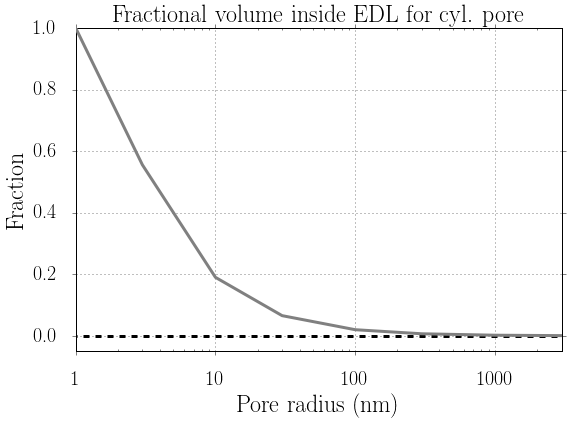

In [5]:
fig = plt.figure(figsize = (8,6), tight_layout = True)

plt.semilogx(rs, ratios, lw = 3, c = 'gray', zorder = 3)
plt.semilogx([.1*nm,1], [0,0], lw = 3, c = 'black', ls = '--', zorder = 2)

plt.xlim(min(rs), max(rs))
plt.ylim(-0.05, 1.0)


plt.title('Fractional volume inside EDL for cyl. pore', size = title_size)
plt.xlabel('Pore radius (nm)', size = axislabel_size)
plt.ylabel('Fraction', size = axislabel_size)

ax = plt.gca()
ax.set_xticklabels(['', '1', '10', '100', '1000'])
ax.set_yticklabels(['', '0.0', '0.2', '0.4', '0.6', '0.8', '1.0'])
plt.tick_params(labelsize = axistick_size, direction = 'out', pad = 15)
plt.grid()

#plt.savefig('fractional_volume.png', dpi = 300)

plt.show()

## Debye length plot

### Constants

In [6]:
nm = 10**(-9.)                                                     # nanometer
z = 1                                                              # Valency
e = 1.6*10**(-19.)                                                 # Elementary charge
N = 6.02*10**23.                                                   # Avogadro's number
epsilon_0 = 8.85*10**(-12.)                                        # Permittivity free space
epsilon_r = 80                                                     #      ""      water
T = 273.15                                                         # Room temp
k_B = 1.38*10**(-23.)                                              # Boltzmann constant
C0s = np.array([1, 3, 10, 30, 100, 300, 1000])*N                   # Bulk concentrations

### Calculate

In [7]:
kappas = np.array([((2*z**2*e**2*C0)/(epsilon_0*epsilon_r*k_B*T))**.5 for C0 in C0s])
debye_lengths = np.array([1./kappa for kappa in kappas])/nm

### Plot

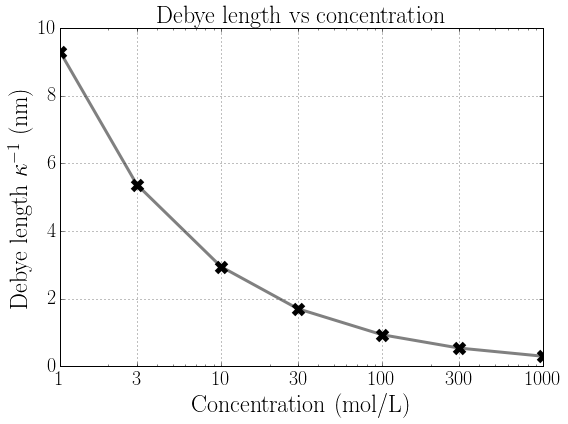

In [8]:
fig = plt.figure(figsize = (8,6), tight_layout = True)

plt.semilogx(C0s/N, debye_lengths, 'kx', ms = 10, mew = 5, mec = 'black', color = 'gray', lw = 3, ls = '-')



plt.title('Debye length vs concentration', size = title_size)
plt.xlabel('Concentration (mol/L)', size = axislabel_size)
plt.ylabel('Debye length $\kappa^{-1}$ (nm)', size = axislabel_size)

plt.grid()
plt.tick_params(labelsize = axistick_size)

ax = plt.gca()

plt.xticks([1, 3, 10, 30, 100, 300, 1000], ['1', '3', '10', '30', '100', '300', '1000'])

#plt.savefig('debye_length.png', dpi = 600)

plt.show()

## Potential, ion number densities

#### Constants

In [9]:
nm = 10**(-9.)                                                     # nanometer
z = 1                                                              # Valency
e = 1.6*10**(-19.)                                                 # Elementary charge
N = 6.02*10**23.                                                   # Avogadro's number
epsilon_0 = 8.85*10**(-12.)                                        # Permittivity free space
epsilon_r = 80                                                     #      ""      water
T = 273.15                                                         # Room temp
k_B = 1.38*10**(-23.)                                              # Boltzmann constant
C_0 = 100*N                                                        # Bulk concentration
kappa = (2*z**2*e**2*C_0/(epsilon_0*epsilon_r*k_B*T))**.5          # Inverse Debye length

sigmas = np.array([0.1, 0.25, 0.5, 0.75, 1.0])*-1*e/(nm**2.)            # Surface charges

### Grahame-equation
- This is a transcendental equation linking surface charge density to electrostatic potential
- Use the Brent algorithm in scipy to solve, which finds the roots of an equation

In [10]:
def grahame(psi_0):
    return sigma-epsilon_0*epsilon_r*psi_0*kappa*2*k_B*T/(z**2.*e*psi_0)*math.sinh(z**2.*e*psi_0/(2*k_B*T))

In [11]:
psi_0s = []
for i, sigma in enumerate(sigmas):
    psi_0s.append(scipy.optimize.brentq(grahame, -0.4, 0.4))
psi_0s = np.array(psi_0s)

In [12]:
print psi_0s

[-0.02038655 -0.04527549 -0.07268499 -0.09060263 -0.10372046]


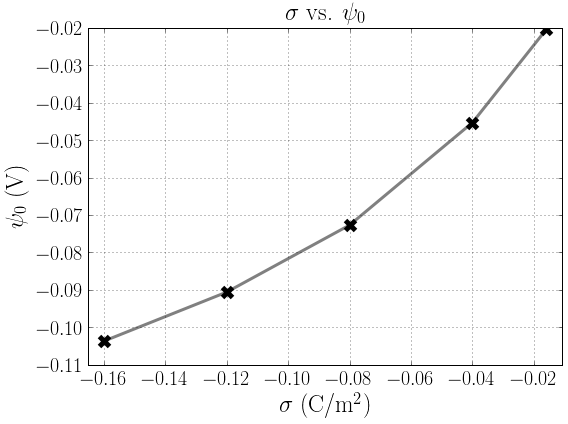

In [13]:
fig = plt.figure(figsize = (8,6), tight_layout = True)

plt.plot(sigmas, psi_0s, 'kx', ls = '-', lw = 3, ms = 10, mew = 5, mec = 'black', color = 'gray')

plt.xlim(sigmas.min()-.005, sigmas.max()+.005)

plt.title('$\sigma$ vs. $\psi_{0}$', size = title_size)
plt.xlabel('$\sigma$ (C/m$^{2}$)', size = axislabel_size)
plt.ylabel('$\psi_{0}$ (V)', size = axislabel_size)

plt.grid()
plt.tick_params(labelsize = axistick_size)

plt.show()

### Potential

In [16]:
xs = np.array([i*.01*kappa**(-1) for i in range(1000)]) # Generate x values; we're going out to 10 debye lengths from the surface

psis = []

for i, psi_0 in enumerate(psi_0s):
    psis.append([])
    for x in xs:
        psis[i].append(2*k_B*T/(z*e)*np.log((1+math.tanh(z**2.*e*psi_0/(4*k_B*T))*np.exp(-kappa*x))/(1-math.tanh(z**2.*e*psi_0/(4*k_B*T))*np.exp(-kappa*x))))

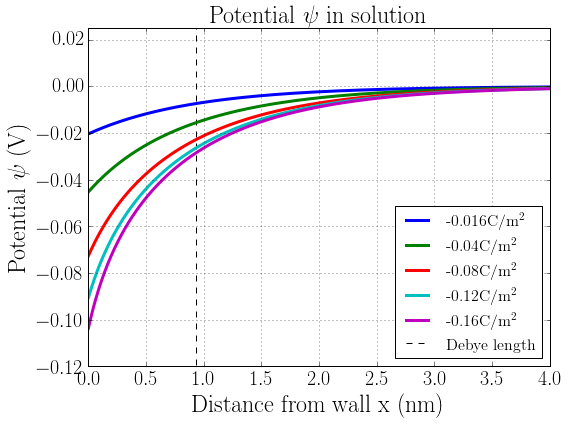

In [36]:
fig = plt.figure(figsize = (8,6), tight_layout = True)

for i, psi in enumerate(psis):
    plt.plot(xs/nm, psi, lw = 3, label = str(sigmas[i]) + 'C/m$^{2}$', zorder = 2)
    
plt.plot(np.array([kappa**(-1.), kappa**(-1.)])/nm, [-1, 1], ls = '--', lw = 1, zorder = 1, color = 'black', label = 'Debye length')

    
plt.xlim(0, 4)
plt.ylim(-0.12, 0.025)
    
plt.title('Potential $\psi$ in solution', size = title_size)
plt.xlabel('Distance from wall x (nm)', size = axislabel_size)
plt.ylabel('Potential $\psi$ (V)', size = axislabel_size)

plt.legend(loc = 'lower right', fontsize = legendlabel_size)
    
plt.grid()
plt.tick_params(labelsize = axistick_size)
    
plt.savefig('potential.png', dpi = 600)
    
plt.show()

### Concentrations